<a href="https://colab.research.google.com/github/sagargupta35/Mobile-Price-Prediction-Model/blob/main/model_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Om Sai Ram")

Om Sai Ram


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

In [5]:
import os
from pathlib import Path
def load_data() -> pd.DataFrame:
  od.download('https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025')
  if Path('mobiles-dataset-2025/Mobiles Dataset (2025).csv').is_file():
    os.rename('mobiles-dataset-2025/Mobiles Dataset (2025).csv', 'mobiles-dataset-2025/mobile_dataset.csv')
  return pd.read_csv('mobiles-dataset-2025/mobile_dataset.csv', encoding="ISO-8859-1")


In [6]:
df = load_data()
data = load_data()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sagargupta35
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025


100%|██████████| 19.8k/19.8k [00:00<00:00, 11.5MB/s]


Skipping, found downloaded files in "./mobiles-dataset-2025" (use force=True to force download)


In [7]:
data['Company Name'].str.title().unique()

array(['Apple', 'Samsung', 'Oneplus', 'Vivo', 'Iqoo', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'Poco'], dtype=object)

In [8]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls "/content/drive/My Drive"

 App.gslides			 'IWT lecture 1 (1) (4).gslides'  'Sagar_Resume (1).pdf'
 Classroom			 'IWT lecture 1 (1).gslides'	   Sagar_Resume.pdf
'Colab Notebooks'		 'IWT UNIT-1 (1).gdoc'		  'Understanding WEB.gslides'
'Curriculum_vitae (1).pdf'	 'IWT UNIT-1 (2).gdoc'		  'website planning (1).gdoc'
'Gametheory (1).gdoc'		 'IWT UNIT-1.gdoc'		  'website planning (2).gdoc'
'IWT lecture 1 (1) (1).gslides'   php.gslides			  'website planning.gdoc'
'IWT lecture 1 (1) (2).gslides'   processor_data.csv		   XML.gslides
'IWT lecture 1 (1) (3).gslides'  'Programming in PHP.gdoc'


In [11]:
def read_pro_data():
  pro_df_path = '/content/drive/My Drive/processor_data.csv'
  return pd.read_csv(pro_df_path)

In [12]:
pro_df = read_pro_data()
pro_df_cp = read_pro_data()

**Data Cleaning**

In [13]:
df['Processor'] = df['Processor'].map(lambda name: name if name.split(" ")[0] != 'Dimensity' else 'MediaTek ' + name)

In [14]:
df['Compnay Name'] = df['Company Name'].str.title()

In [15]:
df['Processor'] = df['Processor'].map(lambda name: name.replace('+', ' Plus'))

In [16]:
df['Processor'] = df['Processor'].map(lambda name: 'Qualcomm ' + name if name.split(' ')[0] == 'Snapdragon' else name)

In [17]:
pro_df.loc[0, 'Processor'] = 'Qualcomm Snapdragon 8 Elite'

In [18]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.6 MB/s eta 0:00:00


In [19]:
from thefuzz import fuzz, process

In [20]:
choices = ["Kirin 9000", "Snapdragon 8 Gen 2", "Exynos 2200"]
best_match = process.extractOne("Qualcomm Snapdragon 8 Gen 2 (5G)", choices)
best_match

('Snapdragon 8 Gen 2', 90)

In [21]:
df_processors = df['Processor'].unique()

In [22]:
csv_processors = pro_df['Processor']

In [23]:
df.shape

(930, 16)

In [24]:
best_matches = []
for pro in df_processors:
  name, score, index = process.extractOne(pro, csv_processors)
  if score >= 75:
    best_matches.append(name)
  else:
    best_matches.append(None)

In [25]:
best_matches = np.array(best_matches)
np.sum(best_matches == None)

3

In [26]:
proc_map = {}
for i, proc in enumerate(df_processors):
  proc_map[proc] = best_matches[i]

In [27]:
df['Processor'] = df['Processor'].map(lambda name: proc_map.get(name, None))

In [28]:
df.dropna(inplace = True)

In [29]:
df.shape

(919, 16)

In [30]:
df = df.merge(pro_df, left_on="Processor", right_on="Processor", how="left")

In [31]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),...,Launched Price (USA),Launched Price (Dubai),Launched Year,Compnay Name,Rating,Antutu_Score,Geekbench_Min,Geekbench_Max,Cores,Clock_Speed
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A16 Bionic,"3,600mAh",6.1 inches,"PKR 224,999",...,USD 799,"AED 2,799",2024,Apple,89,1445704,2627,6838,6,3460
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A16 Bionic,"3,600mAh",6.1 inches,"PKR 234,999",...,USD 849,"AED 2,999",2024,Apple,89,1445704,2627,6838,6,3460
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A16 Bionic,"3,600mAh",6.1 inches,"PKR 244,999",...,USD 899,"AED 3,199",2024,Apple,89,1445704,2627,6838,6,3460
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A16 Bionic,"4,200mAh",6.7 inches,"PKR 249,999",...,USD 899,"AED 3,199",2024,Apple,89,1445704,2627,6838,6,3460
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A16 Bionic,"4,200mAh",6.7 inches,"PKR 259,999",...,USD 949,"AED 3,399",2024,Apple,89,1445704,2627,6838,6,3460


In [32]:
def extract_storage(name: str) -> str:
  tags = name.split(" ")
  storage = tags[-1]
  if storage.endswith('GB'):
    return storage[0:-2]
  return None

In [33]:
df['Storage'] = df['Model Name'].apply(extract_storage)

In [34]:
df.columns = df.columns.str.replace(' ', '_')

In [35]:
df.columns = df.columns.str.replace('(',  '')

In [36]:
df.columns = df.columns.str.replace(')',  '')

In [37]:
df.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'RAM', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_USA', 'Launched_Price_Dubai',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage'],
      dtype='object')

In [38]:
df['Mobile_Weight'] = df['Mobile_Weight'].map(lambda weight: weight[:-1]).astype('float64')

In [39]:
df.columns = df.columns.str.title()

In [40]:
df.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage'],
      dtype='object')

In [41]:
df['Ram'] = df['Ram'].str.extract(r'(\d+\.?\d*)')[0]

In [42]:
df['Ram'] = df['Ram'].astype('float64')

In [43]:
df['Front_Camera'] = df['Front_Camera'].str.extract(r'(\d+)')[0].astype('int64')

In [44]:
import re
def get_max_camera_clarity(ls):
  maxi = 0
  for s in ls:
    cur_maxi = int(re.search('(\d+)', s).group())
    maxi = max(maxi, cur_maxi)
  return maxi

In [45]:
df['Back_Camera'].unique()

array(['48MP', '50MP + 12MP', '48MP + 12MP', '12MP + 12MP', '12MP',
       '12MP + 12MP + 12MP', '8MP', '12MP + 10MP', '200MP + 12MP',
       '108MP + 12MP', '48MP + 8MP', '50MP + 5MP', '50MP + 2MP',
       '108MP + 8MP', '50MP + 8MP', '13MP + 2MP', '12MP + 16MP', '50MP',
       '16MP', '16MP + 5MP', '13MP', '13MP + 5MP', '16MP + 8MP',
       '13MP + 8MP', '13MP + 6MP', '5MP', '50MP + 48MP', '108MP',
       '64MP + 2MP', '48MP + 48MP', '48MP + 50MP', '48MP + 16MP',
       '48MP + 5MP', '64MP + 8MP', '20MP + 16MP', '16MP + 20MP',
       '50MP + 16MP', '200MP', '64MP', '13MP+2MP', '48MP + 64MP + 48MP',
       '50MP + 32MP + 48MP', '50MP + 50MP + 50MP', '50MP + 50MP',
       '50MP + 8MP + 2MP', '50MP + 50MP + 8MP', '50MP + 32MP + 8MP',
       '64MP + 8MP + 2MP', '8MP + 2MP', '50MP + 50MP + 64MP',
       '50MP + 50MP + 13MP', '50MP + 48MP + 32MP', '64MP + 32MP + 8MP',
       '50MP + 64MP + 8MP', '64MP + 8MP + 2MP + 2MP',
       '50MP + 13MP + 16MP + 2MP', '50MP + 16MP + 13MP + 2MP',
      

In [46]:
get_max_camera_clarity(['50MP (wide)', '108MP (Main)'])

108

In [47]:
df['Back_Camera'] = df['Back_Camera'].str.split(' + ').apply(get_max_camera_clarity)

In [48]:
df.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage'],
      dtype='object')

In [49]:
df['Launched_Price_China'] = df['Launched_Price_China'].str.extract(r'(\d+,*\d*)')[0].str.replace(',', '').astype('int64')

In [50]:
df['Launched_Price_India'] = df['Launched_Price_India'].str.replace(',', '').str.replace('INR ', '').astype('int64')

In [51]:
df['Launched_Price_Dubai'] = df['Launched_Price_Dubai'].str.extract(r'(\d+,*\d*)')[0].str.replace(',', '').astype('int64')

In [52]:
df.drop(np.argmax(df['Launched_Price_Pakistan'] == 'Not available'), axis = 0, inplace = True)

In [53]:
df['Launched_Price_Pakistan'] = df['Launched_Price_Pakistan'].str.extract(r'(\d+,*\d*)')[0].str.replace(',', '').astype('int64')

In [54]:
df['Launched_Price_Usa'] = df['Launched_Price_Usa'].str.extract(r'(\d+,*\d*)')[0].str.replace(',', '').astype('int64')

In [55]:
df['Screen_Size'] = df['Screen_Size'].str.extract(r'(\d+\.?\d*)')[0].astype('float64')

In [56]:
df['Battery_Capacity'] = df['Battery_Capacity'].str.replace(',', '').str.replace('mAh', '').astype('int64')

In [57]:
df.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage'],
      dtype='object')

In [58]:
df.head()

,Company_Name,Model_Name,Mobile_Weight,Ram,Front_Camera,Back_Camera,Processor,Battery_Capacity,Screen_Size,Launched_Price_Pakistan,...,Launched_Price_Dubai,Launched_Year,Compnay_Name,Rating,Antutu_Score,Geekbench_Min,Geekbench_Max,Cores,Clock_Speed,Storage
0,Apple,iPhone 16 128GB,174.0,6.0,12,48,A16 Bionic,3600,6.1,224999,...,2799,2024,Apple,89,1445704,2627,6838,6,3460,128
1,Apple,iPhone 16 256GB,174.0,6.0,12,48,A16 Bionic,3600,6.1,234999,...,2999,2024,Apple,89,1445704,2627,6838,6,3460,256
2,Apple,iPhone 16 512GB,174.0,6.0,12,48,A16 Bionic,3600,6.1,244999,...,3199,2024,Apple,89,1445704,2627,6838,6,3460,512
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12,48,A16 Bionic,4200,6.7,249999,...,3199,2024,Apple,89,1445704,2627,6838,6,3460,128
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12,48,A16 Bionic,4200,6.7,259999,...,3399,2024,Apple,89,1445704,2627,6838,6,3460,256


In [59]:
df.isna().sum()

,0
Company_Name,0
Model_Name,0
Mobile_Weight,0
Ram,0
Front_Camera,0
Back_Camera,0
Processor,0
Battery_Capacity,0
Screen_Size,0
Launched_Price_Pakistan,0


In [60]:
storage_cp = df['Storage']

In [61]:
storage_cp.map(lambda storage: int(storage) if storage is not None else np.nan).unique()

array([128., 256., 512.,  64.,  32.,  nan,  16.])

In [62]:
df['Storage'] = df['Storage'].map(lambda storage: int(storage) if storage is not None else np.nan)

In [63]:
df.dtypes

,0
Company_Name,object
Model_Name,object
Mobile_Weight,float64
Ram,float64
Front_Camera,int64
Back_Camera,int64
Processor,object
Battery_Capacity,int64
Screen_Size,float64
Launched_Price_Pakistan,int64


# Exploratory Data Analysis (EDA)

In [64]:
mobiles = df.copy()

In [65]:
df.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = mobiles.drop(['Launched_Price_Pakistan', 'Launched_Price_India', 'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai'], axis = 1)
y = mobiles[['Launched_Price_Pakistan', 'Launched_Price_India', 'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai']]

In [68]:
y.describe()

,Launched_Price_Pakistan,Launched_Price_India,Launched_Price_China,Launched_Price_Usa,Launched_Price_Dubai
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,126582.911765,50917.704793,3842.638344,629.802832,2197.625272
std,101651.106735,40664.400501,2723.793745,1354.131489,1549.398850
min,15999.000000,5999.000000,499.000000,79.000000,299.000000
25%,54999.000000,19999.000000,1799.000000,269.250000,1005.000000
50%,89999.000000,34999.000000,2899.500000,449.000000,1699.000000
75%,179999.000000,74974.250000,5499.000000,849.000000,3199.000000
max,604999.000000,274999.000000,17999.000000,39622.000000,11099.000000


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=mobiles['Company_Name'], random_state = 9)

In [70]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [71]:
train_data.head()

,Company_Name,Model_Name,Mobile_Weight,Ram,Front_Camera,Back_Camera,Processor,Battery_Capacity,Screen_Size,Launched_Year,...,Geekbench_Min,Geekbench_Max,Cores,Clock_Speed,Storage,Launched_Price_Pakistan,Launched_Price_India,Launched_Price_China,Launched_Price_Usa,Launched_Price_Dubai
725,Tecno,Spark 20 Pro 128GB,195.0,6.0,16,50,MediaTek Helio G85,5000,6.60,2024,...,413,1332,8,2000,128.0,39999,14999,1199,199,749
819,Honor,X30 Max,228.0,8.0,8,64,MediaTek Dimensity 900,5000,7.09,2021,...,898,2239,8,2400,NaN,89999,35999,2399,499,1899
315,Vivo,Pad 2 256GB,535.0,8.0,8,50,MediaTek Dimensity 1200,8040,11.00,2023,...,1113,3172,8,3000,256.0,74999,39999,3199,399,1399
521,Xiaomi,Xiaomi 15 Pro 256GB,210.0,12.0,32,50,Qualcomm Snapdragon 8 Elite,6100,6.73,2024,...,3155,9723,8,4320,256.0,199999,89999,5299,799,3299
422,Oppo,K11x 128GB,195.0,8.0,16,108,Qualcomm Snapdragon 695,5000,6.72,2023,...,908,2134,8,2200,128.0,59999,18000,1499,199,1000


In [72]:
pd.DataFrame({'Train': (X_train['Company_Name'].value_counts())/len(X_train), 'Test': (X_test['Company_Name'].value_counts())/len(X_test)})

,Train,Test
Company_Name,,
Apple,0.104905,0.108696
Google,0.023161,0.021739
Honor,0.099455,0.097826
Huawei,0.046322,0.043478
Infinix,0.061308,0.059783
Lenovo,0.014986,0.016304
Motorola,0.066757,0.070652
Nokia,0.008174,0.005435
OnePlus,0.057221,0.059783


In [73]:
X_train.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage'],
      dtype='object')

In [74]:
import seaborn as sns

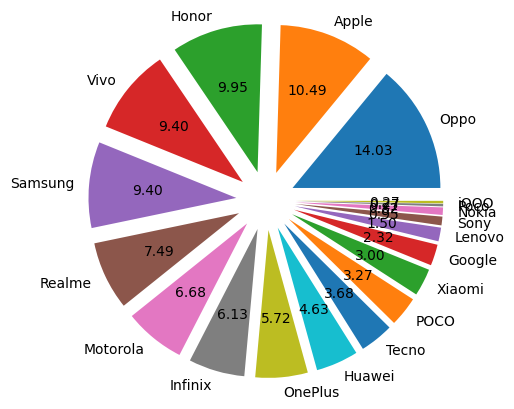

In [75]:
company_vc = X_train['Company_Name'].value_counts()
plt.pie(
    company_vc,
    explode = [0.2]*len(company_vc),
    autopct = '%.2f',
    labels= company_vc.index
)
plt.show()

In [76]:
cmp_avg_launch_price = train_data.groupby(by = 'Company_Name')[y.columns].mean()

In [77]:
cmp_avg_launch_price.index

Index(['Apple', 'Google', 'Honor', 'Huawei', 'Infinix', 'Lenovo', 'Motorola',
       'Nokia', 'OnePlus', 'Oppo', 'POCO', 'Poco', 'Realme', 'Samsung', 'Sony',
       'Tecno', 'Vivo', 'Xiaomi', 'iQOO'],
      dtype='object', name='Company_Name')

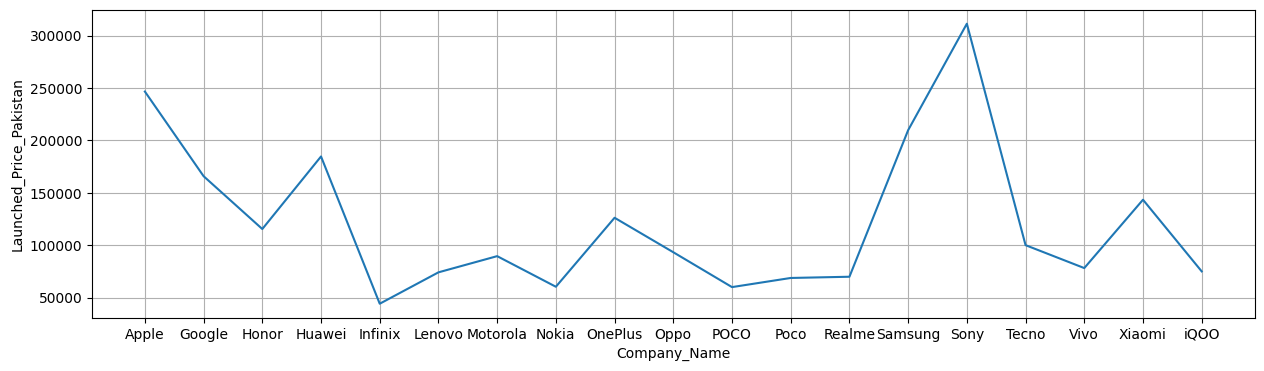

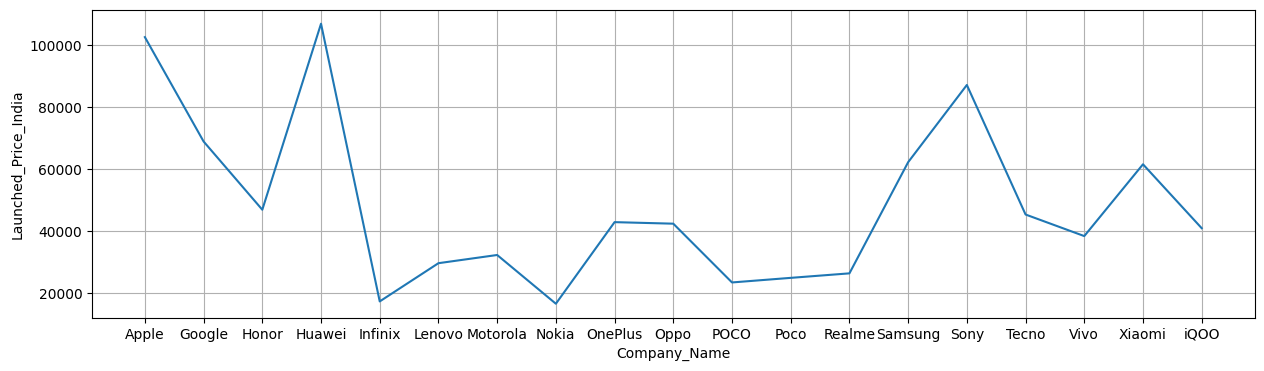

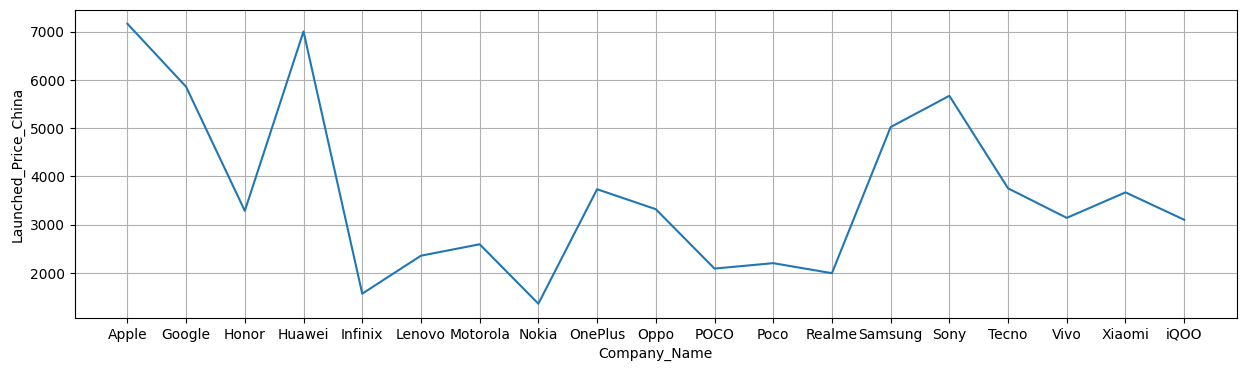

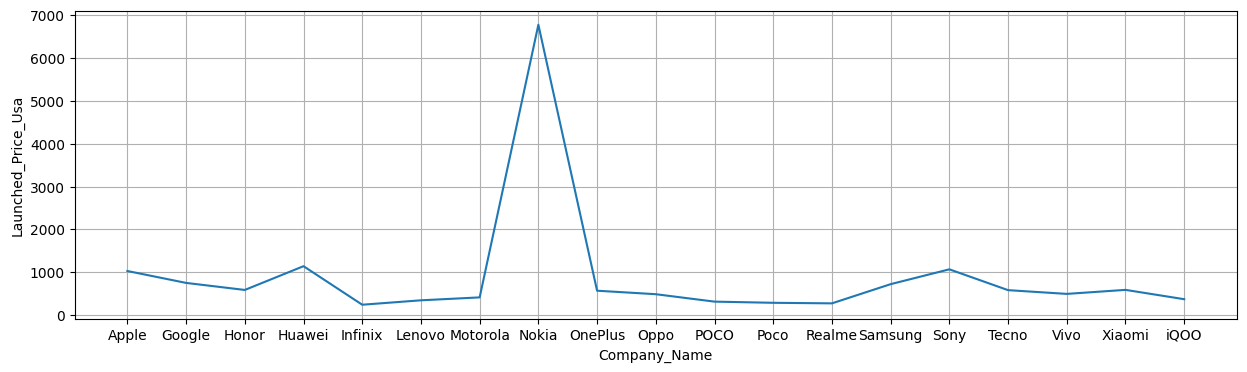

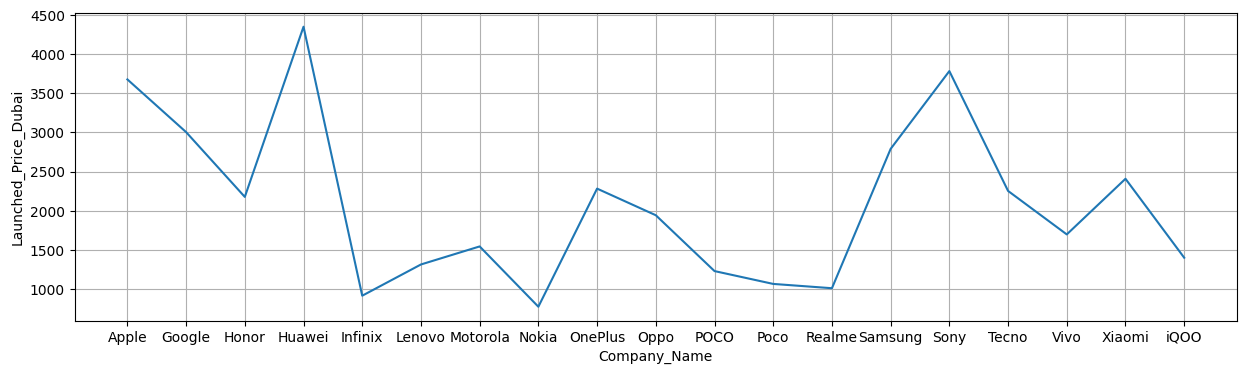

In [78]:
for i, country in enumerate(cmp_avg_launch_price.columns):
  plt.figure(figsize = (15, 4))
  plt.grid(True)
  sns.lineplot(x = cmp_avg_launch_price.index, y = cmp_avg_launch_price[country])
  plt.show()

Sony, Apple and Huawei costs high in every country. But nokia mobiles are too costly in USA

In [79]:
mobile_weight_price = train_data.groupby(by = 'Mobile_Weight')['Launched_Price_India'].mean()
mobile_weight_price

,Launched_Price_India
Mobile_Weight,
135.0,76566.666667
140.0,76566.666667
143.0,25994.500000
146.0,14999.000000
147.0,39999.000000
...,...
674.0,64999.000000
682.0,114900.000000
708.0,189900.000000


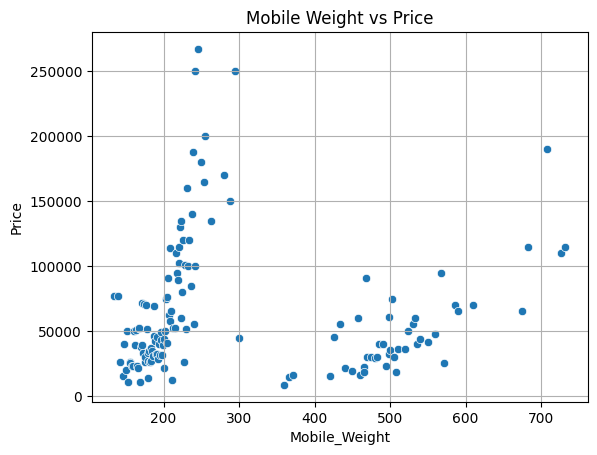

In [80]:
plt.grid(True)
plt.title('Mobile Weight vs Price')
plt.ylabel('Price')
plt.xticks(np.arange(0, 800, 100))
sns.scatterplot(x = mobile_weight_price.index, y = mobile_weight_price.values.round(2))
plt.show()

higher the ram, higher the price

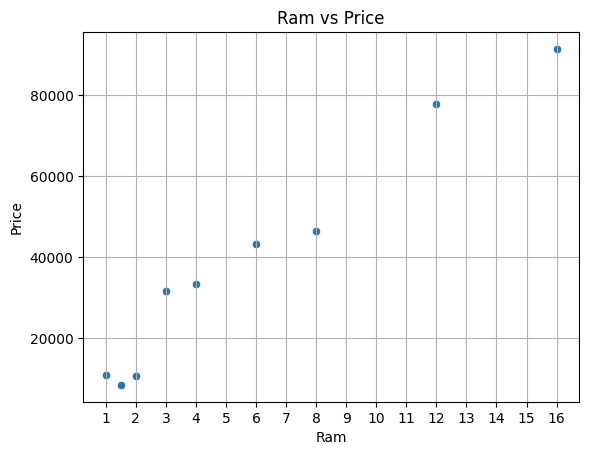

In [81]:
ram_price = train_data.groupby(by = 'Ram')['Launched_Price_India'].mean()
plt.grid(True)
plt.title('Ram vs Price')
plt.ylabel('Price')
plt.xticks(np.arange(1, 17))
sns.scatterplot(x = ram_price.index, y = ram_price.values.round(2))
plt.show()

In [82]:
train_data.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai'],
      dtype='object')

In [83]:
front_camera_price = train_data.groupby(by = ['Front_Camera', 'Company_Name'])['Launched_Price_India'].mean()
front_camera_price = front_camera_price.reset_index()

In [84]:
front_camera_price

,Front_Camera,Company_Name,Launched_Price_India
0,2,Honor,15499.000000
1,2,Samsung,12499.000000
2,5,Honor,19317.181818
3,5,Infinix,10499.000000
4,5,Motorola,10332.333333
...,...,...,...
80,50,Oppo,62499.000000
81,50,Tecno,74999.000000
82,50,Vivo,32799.000000
83,60,Huawei,52874.000000


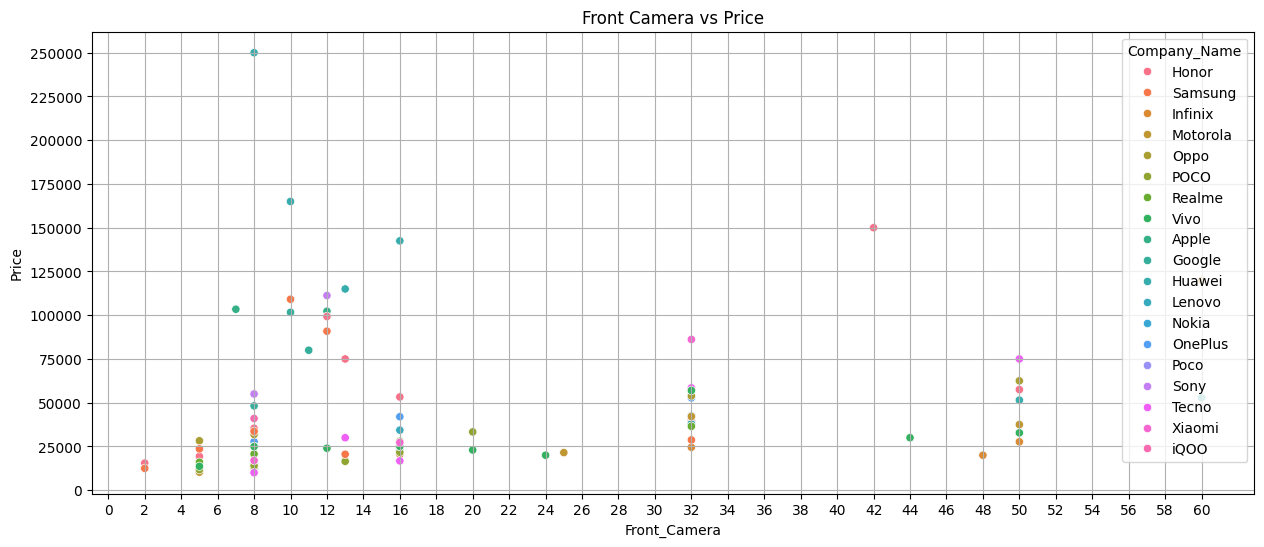

In [85]:
plt.figure(figsize = (15, 6))
plt.grid(True)
plt.title('Front Camera vs Price')
plt.yticks(np.arange(0, 275000, 25000))
plt.ylabel('Price')
plt.xticks(np.arange(0, 62, 2))
sns.scatterplot(data=front_camera_price, x = 'Front_Camera', y = 'Launched_Price_India', hue = 'Company_Name')
plt.show()

In [86]:
back_camera_price = train_data.groupby(by = ['Back_Camera', 'Company_Name'])['Launched_Price_India'].mean()
back_camera_price = back_camera_price.reset_index()

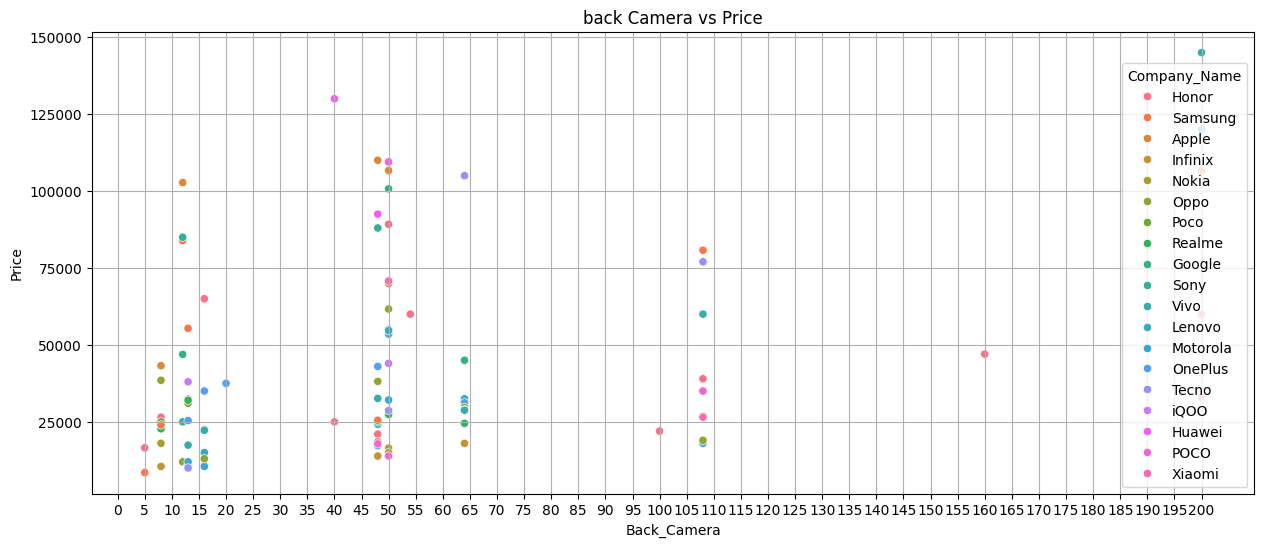

In [87]:
plt.figure(figsize = (15, 6))
plt.grid(True)
plt.title('back Camera vs Price')
plt.yticks(np.arange(0, 275000, 25000))
plt.xticks(np.arange(0, 205, 5))
plt.ylabel('Price')
sns.scatterplot(data=back_camera_price, x = 'Back_Camera', y = 'Launched_Price_India', hue = 'Company_Name')
plt.show()

In [88]:
train_data.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai'],
      dtype='object')

In [89]:
companies_sorted = train_data['Company_Name'].value_counts().sort_values(ascending = False).index

In [90]:
companies_sorted

Index(['Oppo', 'Apple', 'Honor', 'Vivo', 'Samsung', 'Realme', 'Motorola',
       'Infinix', 'OnePlus', 'Huawei', 'Tecno', 'POCO', 'Xiaomi', 'Google',
       'Lenovo', 'Sony', 'Nokia', 'Poco', 'iQOO'],
      dtype='object', name='Company_Name')

In [91]:
n_comp = 8

In [92]:
battery_capacity_price = train_data.groupby(by = ['Battery_Capacity', 'Company_Name'])['Launched_Price_India'].mean().reset_index()

In [93]:
battery_capacity_price = battery_capacity_price[battery_capacity_price['Company_Name'].map(lambda name: name in companies_sorted[:n_comp])]

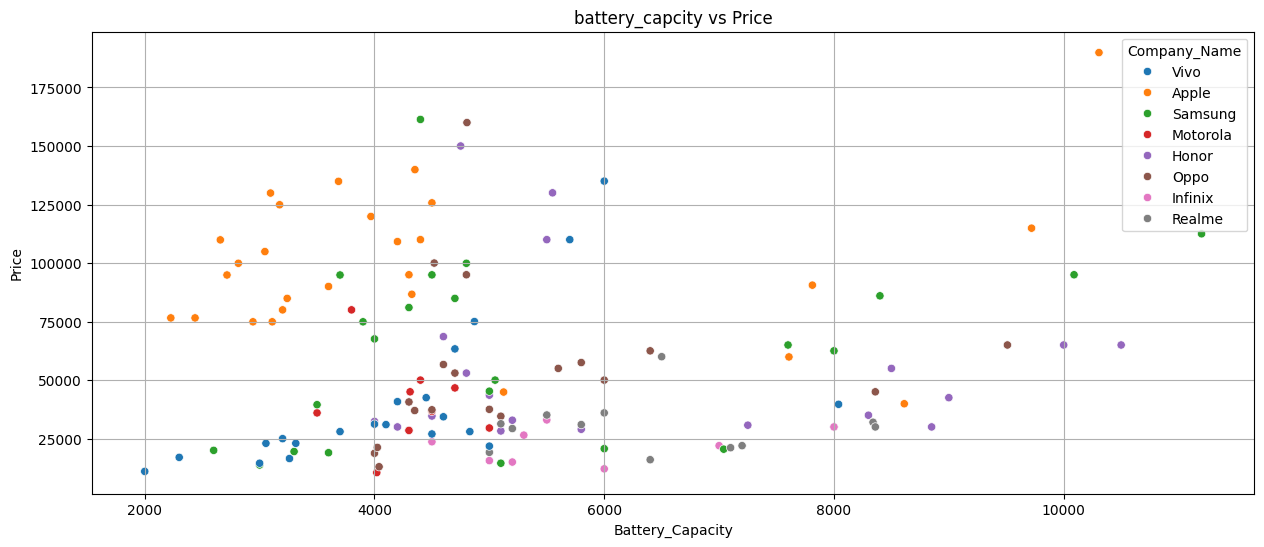

In [94]:
plt.figure(figsize = (15, 6))
plt.grid(True)
plt.title('battery_capcity vs Price')
plt.yticks(np.arange(0, 275000, 25000))
plt.ylabel('Price')
sns.scatterplot(data=battery_capacity_price, x = 'Battery_Capacity', y = 'Launched_Price_India', hue = 'Company_Name')
plt.show()

It seems for every company as battery_capacity increases their price increases

In [95]:
battery_capacity_screen = df.groupby(by = ['Battery_Capacity', 'Screen_Size'])['Launched_Price_India'].mean().reset_index()
battery_capacity_screen

,Battery_Capacity,Screen_Size,Launched_Price_India
0,2000,5.0,10999.000000
1,2227,5.4,76566.666667
2,2300,5.5,16999.000000
3,2438,5.4,76566.666667
4,2600,5.2,19990.000000
...,...,...,...
295,10500,13.0,64999.000000
296,10500,13.2,74999.000000
297,10500,13.5,84999.000000
298,11000,12.4,69999.000000


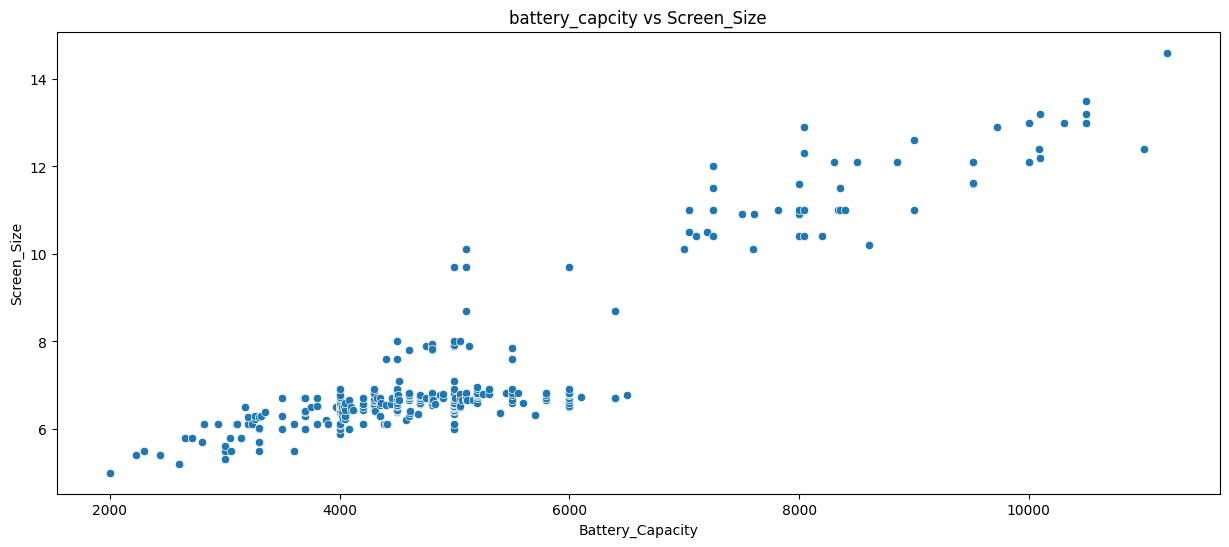

In [96]:
plt.figure(figsize = (15, 6))
plt.title('battery_capcity vs Screen_Size')
plt.ylabel('Screen_Size')
sns.scatterplot(data=battery_capacity_screen, x = 'Battery_Capacity', y = 'Screen_Size')
plt.show()

battery_capacity is strong positively correlated with screen size. Also there are 2 clusters in this. Probably the boundary is between mobiles and tablets

In [97]:
df.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage'],
      dtype='object')

In [98]:
numeric_cols = train_data.select_dtypes(include = [np.number]).columns
numeric_cols

Index(['Mobile_Weight', 'Ram', 'Front_Camera', 'Back_Camera',
       'Battery_Capacity', 'Screen_Size', 'Launched_Year', 'Rating',
       'Antutu_Score', 'Geekbench_Min', 'Geekbench_Max', 'Cores',
       'Clock_Speed', 'Storage', 'Launched_Price_Pakistan',
       'Launched_Price_India', 'Launched_Price_China', 'Launched_Price_Usa',
       'Launched_Price_Dubai'],
      dtype='object')

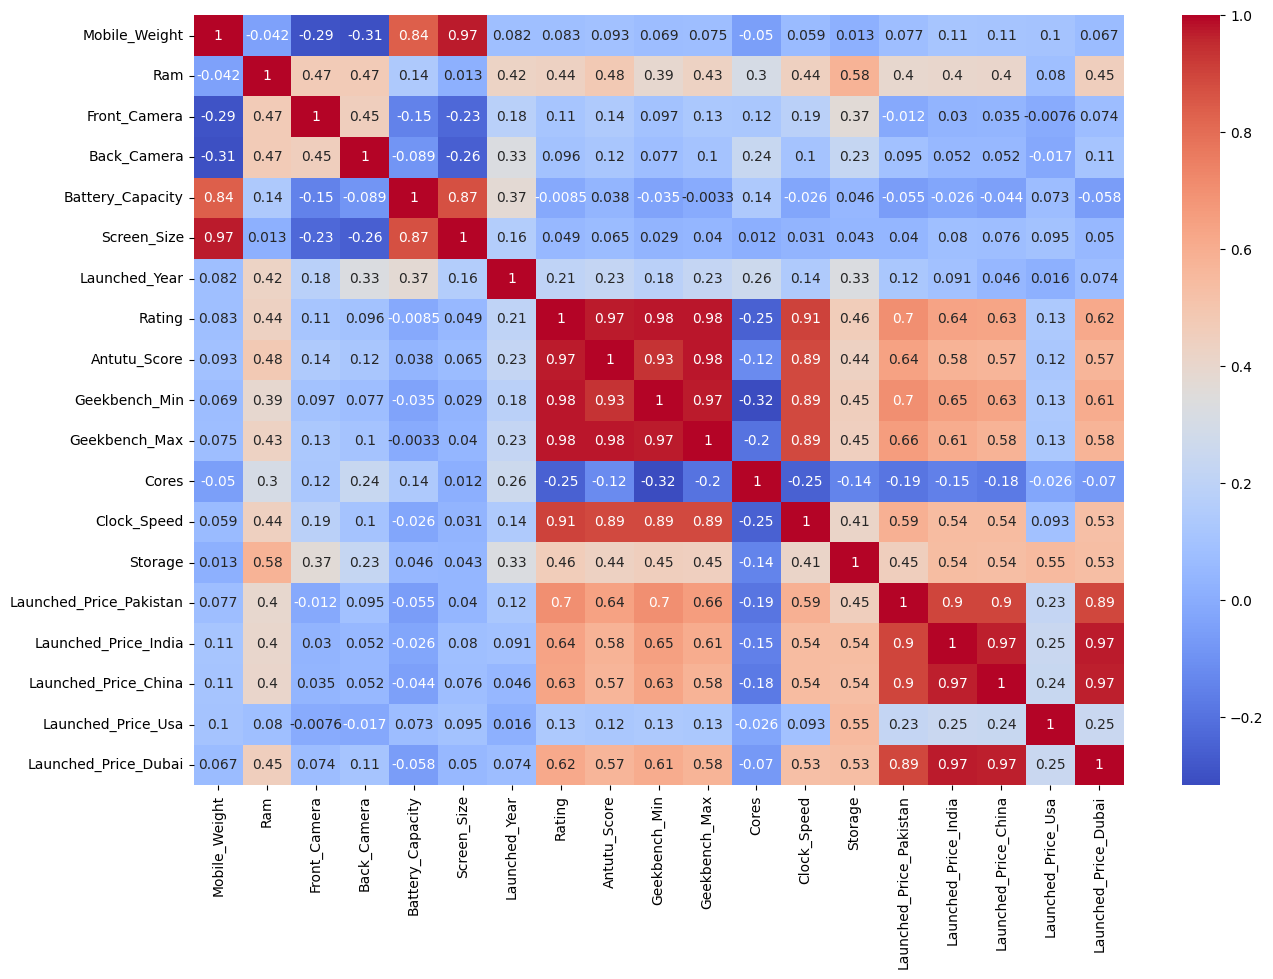

In [99]:
corr_mat = train_data[numeric_cols].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

Important Observations:
1. Storage, Rating, Scores, Ram are very good measure for price
2. Strangely as number of cores increases price decreases
3. Mobile weight, screen size and battery capacity are strongly correlated but they donot affect the price much.
4. Camera quality also mostly donot affect the price.
5. Ram and storage are some of the most important features and are also strongly correlated which is true in general.

Let us study some of these with graphs



In [100]:
train_data.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai'],
      dtype='object')

In [101]:
storage_vs_ram = train_data.groupby(by = ['Storage', 'Ram'])['Launched_Price_India'].mean().reset_index()
storage_vs_ram.head()

,Storage,Ram,Launched_Price_India
0,16.0,1.0,10999.000000
1,16.0,1.5,8499.000000
2,16.0,2.0,13494.500000
3,32.0,2.0,7999.000000
4,32.0,3.0,12832.333333


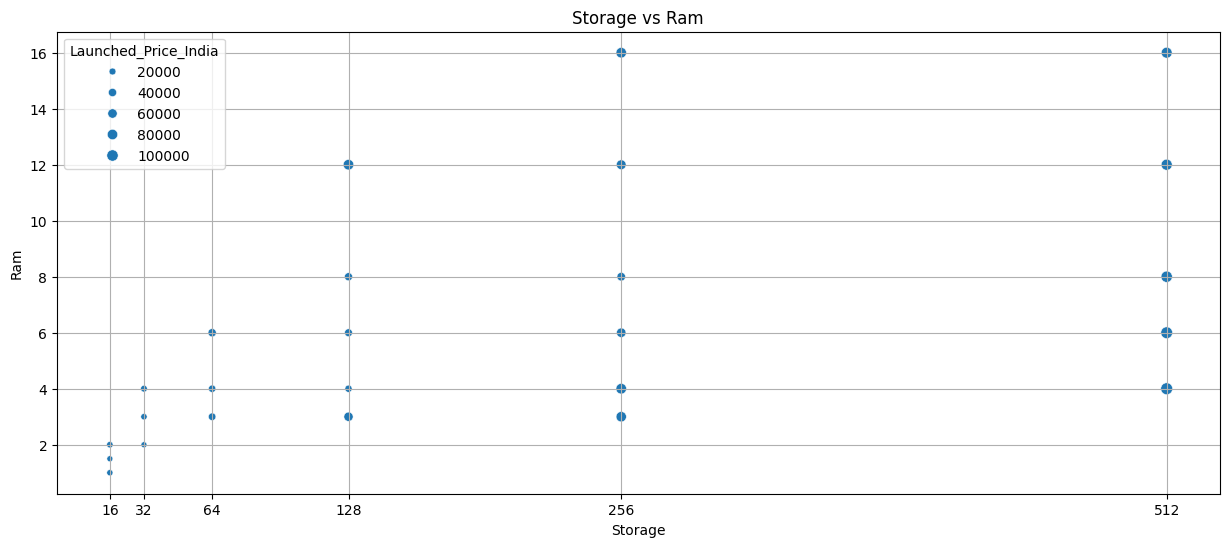

In [102]:
plt.figure(figsize = (15, 6))
plt.grid(True)
plt.title('Storage vs Ram')
plt.ylabel('Ram')
plt.xticks([16, 32, 64, 128, 256, 512])
sns.scatterplot(data=storage_vs_ram, x = 'Storage', y = 'Ram', size = 'Launched_Price_India')
plt.show()

In [103]:
company_ram_storage = train_data.groupby(by = ['Company_Name', 'Ram'])['Storage'].mean().reset_index()

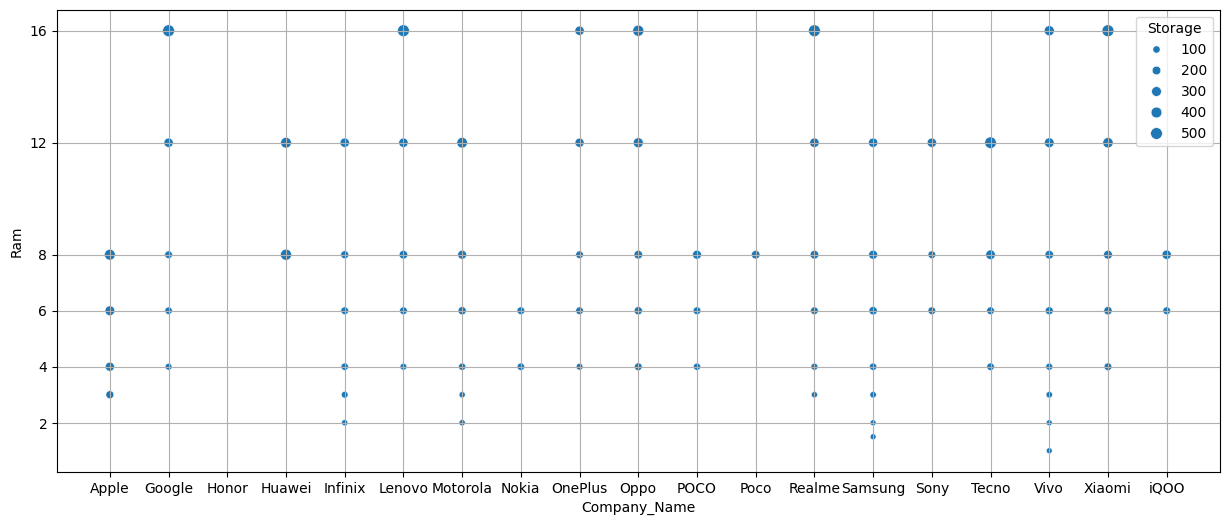

In [104]:
plt.figure(figsize = (15, 6))
plt.grid(True)
plt.yticks([2, 4, 6, 8, 12, 16])
sns.scatterplot(data = company_ram_storage, x = 'Company_Name', y = 'Ram', size = 'Storage')
plt.show()

Definitely, for every company as ram increses, storage and price also increases and vice-versa.

In [105]:
train_data.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai'],
      dtype='object')

In [106]:
len(numeric_cols)

19

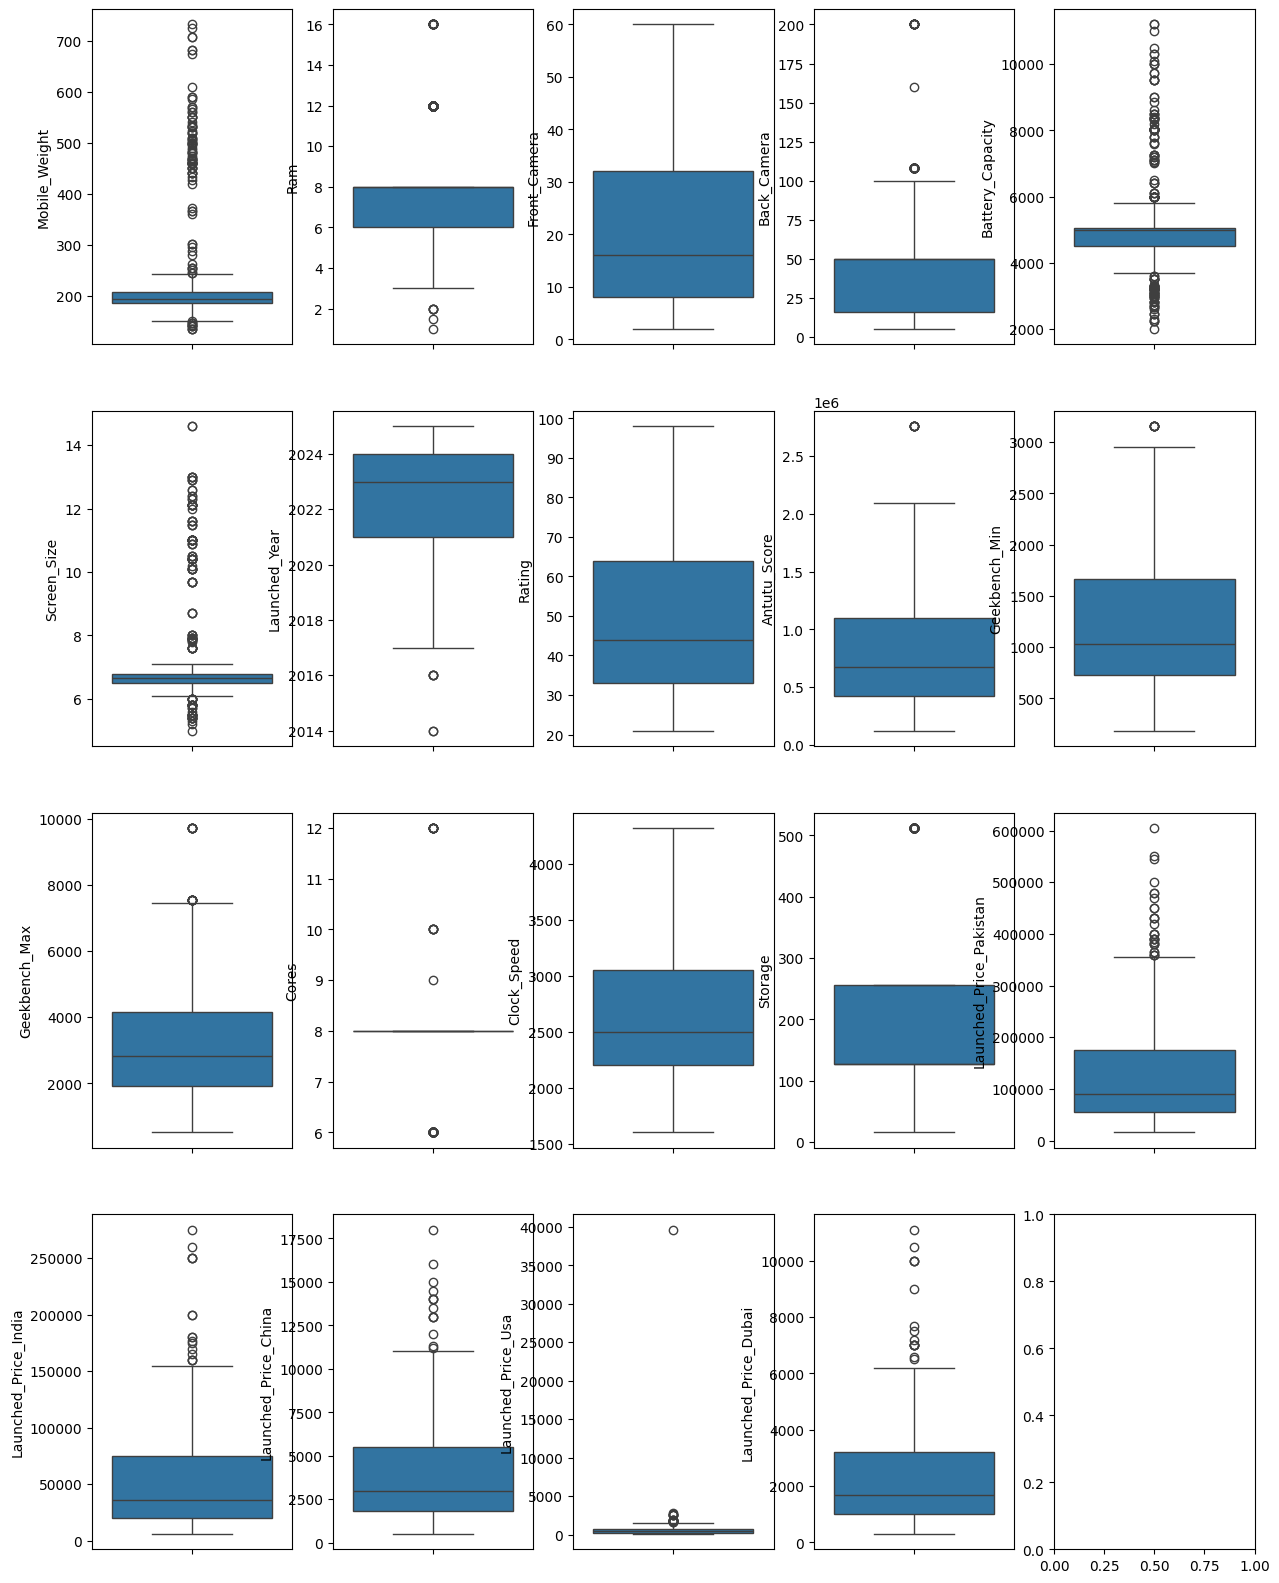

In [107]:
fig, ax = plt.subplots(nrows = 4, ncols = 5, figsize = (15, 20))
ax = ax.flatten()
for i, col in enumerate(numeric_cols):
  sns.boxplot(data = train_data, y = col, ax = ax[i])

There are a lot of outliers in this.

# Feature Engineering

In [108]:
no_nokia_data = train_data[train_data['Company_Name'] != 'Nokia']
pd.DataFrame({'No Nokia': no_nokia_data[numeric_cols].skew(), 'With Nokia': train_data[numeric_cols].skew()})

,No Nokia,With Nokia
Mobile_Weight,2.748798,2.740642
Ram,0.548879,0.557874
Front_Camera,1.245205,1.255014
Back_Camera,1.952588,1.955589
Battery_Capacity,1.821523,1.816115
Screen_Size,2.695728,2.688801
Launched_Year,-1.010707,-1.011120
Rating,0.711913,0.717003
Antutu_Score,1.172905,1.175712
Geekbench_Min,0.725629,0.728003


Nokia mobiles are skewing lauched_price_usa a lot.

In [109]:
len(train_data[train_data['Company_Name'] == 'Nokia'])

6

In [110]:
train_data = train_data[train_data['Company_Name'] != 'Nokia']

In [111]:
train_data.shape

(728, 23)

In [112]:
skew = train_data[numeric_cols].skew().sort_values()
skew

,0
Launched_Year,-1.010707
Clock_Speed,0.435023
Ram,0.548879
Cores,0.566660
Rating,0.711913
Geekbench_Min,0.725629
Geekbench_Max,1.032198
Storage,1.147584
Antutu_Score,1.172905
Front_Camera,1.245205


Almost all are highly skewed
1. Right-Skewed (Positive Skewness) → Apply Log/Box-Cox Transformation
2. Left-Skewed (Negative Skewness) → Apply Square/Cube Transformation

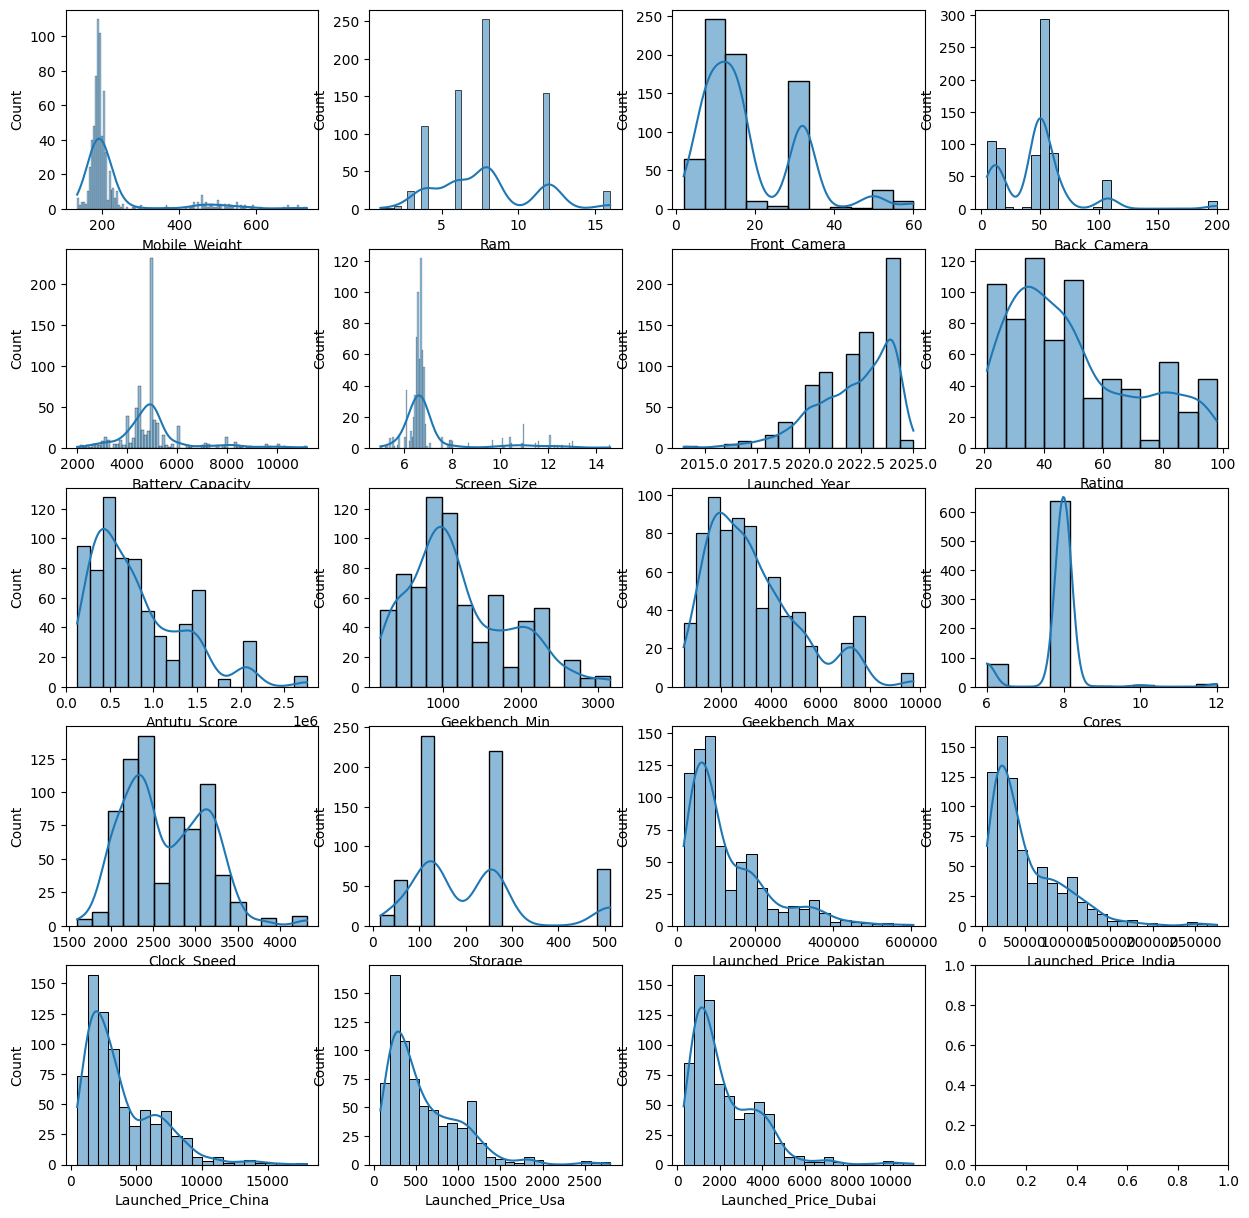

In [113]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize = (15, 15))
ax = ax.flatten()
for i, col in enumerate(numeric_cols):
  sns.histplot(data = train_data, x = col, ax = ax[i], kde = True)

1. Since most regression models assume data is symmetrical, columns that are right skewd can be transformed with yeojohnson or boxcox.
2. Although Storage, Ram, cores and launched_year are a little skewed, they are catogorical variables (have very less unique values). So, oridinal encoding them is better.
3. All the prices roughly have same kernel density estimation (KDE) and are right skewd.

In [114]:
train_data['Launched_Price_India'].describe()

,Launched_Price_India
count,728.000000
mean,51231.035714
std,41368.269470
min,5999.000000
25%,20999.000000
50%,36999.000000
75%,74900.000000
max,274999.000000


In [115]:
train_data.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai'],
      dtype='object')

In [116]:
skewed_columns = ['Mobile_Weight', 'Back_Camera', 'Battery_Capacity', 'Screen_Size', 'Launched_Price_Pakistan', 'Launched_Price_India', 'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai', 'Geekbench_Max', 'Antutu_Score', 'Front_Camera']

In [117]:
from scipy.stats import yeojohnson, skew, boxcox

In [118]:
train_data.dtypes

,0
Company_Name,object
Model_Name,object
Mobile_Weight,float64
Ram,float64
Front_Camera,int64
Back_Camera,int64
Processor,object
Battery_Capacity,int64
Screen_Size,float64
Launched_Year,int64


In [119]:
skew_df = pd.DataFrame({'skew': [], 'yeo_skew': [], 'box_skew': []})
for i, col in enumerate(skewed_columns):
  yeo_data, lam = yeojohnson(train_data[col])
  yeo_skew = skew(yeo_data)
  box_data, lam = boxcox(train_data[col])
  box_skew = skew(box_data)
  skew_df.loc[len(skew_df)] = [train_data[col].skew(), yeo_skew, box_skew]
skew_df.index = skewed_columns
skew_df

,skew,yeo_skew,box_skew
Mobile_Weight,2.748798,0.014439,0.012550
Back_Camera,1.952588,-0.012922,-0.016231
Battery_Capacity,1.821523,-0.048297,-0.048250
Screen_Size,2.695728,-0.232942,-0.255296
Launched_Price_Pakistan,1.527527,0.016584,0.016582
Launched_Price_India,1.704852,0.023175,0.023169
Launched_Price_China,1.442349,0.016946,0.016878
Launched_Price_Usa,1.589162,0.015117,0.014681
Launched_Price_Dubai,1.745789,0.012157,0.012054
Geekbench_Max,1.032198,-0.011344,-0.011363


Rougly they both perform equally better but box-cox is slightly better.

In [120]:
print(skew(boxcox(train_data['Launched_Year'])[0]))
print(skew(yeojohnson(train_data['Launched_Year'])[0]))

nan
-inf


/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:1120: UserWarning: The optimal lambda is 494.23127564668994, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1072: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1076: RuntimeWarning: overflow encountered in square
  s = s**2
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [121]:
train_data_before_skew = train_data.copy()

In [122]:
train_data.columns

Index(['Company_Name', 'Model_Name', 'Mobile_Weight', 'Ram', 'Front_Camera',
       'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size',
       'Launched_Year', 'Compnay_Name', 'Rating', 'Antutu_Score',
       'Geekbench_Min', 'Geekbench_Max', 'Cores', 'Clock_Speed', 'Storage',
       'Launched_Price_Pakistan', 'Launched_Price_India',
       'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai'],
      dtype='object')

Tranformations:
1.   Company_Name - impute and oridinal encode based on the average launched price
2.   Mobile_Weight, Front_Camera, Back_camera, Battery_Capacity, Screen_Size, Antutu_Score, Geekbench_Max, Launched_Prices - impute, boxcox, scale.
3. Rating - impute log and scale.
4. Ram, Storage, Cores, Launched_Year - impute and then ordinal encode them by sorting them directly.



In [123]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [124]:
cmp_price = train_data_before_skew[['Company_Name', 'Launched_Price_India']]
cmp_price_grp = cmp_price.groupby(by = 'Company_Name')['Launched_Price_India'].mean().sort_values()
cmp_price_grp = cmp_price_grp.reset_index()
ord_enc = OrdinalEncoder(categories=[cmp_price_grp['Company_Name'].to_list()])
ord_enc.fit(cmp_price_grp[['Company_Name']])

OrdinalEncoder(categories=[['Infinix', 'POCO', 'Poco', 'Realme', 'Lenovo',
                            'Motorola', 'Vivo', 'iQOO', 'Oppo', 'OnePlus',
                            'Tecno', 'Honor', 'Xiaomi', 'Samsung', 'Google',
                            'Sony', 'Apple', 'Huawei']])

In [125]:
ord_enc.transform([['Huawei']])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[17.]])

In [126]:
def get_cmp_name_encoder():
  cmp_price = train_data_before_skew[['Company_Name', 'Launched_Price_India']]
  cmp_price_grp = cmp_price.groupby(by = 'Company_Name')['Launched_Price_India'].mean().sort_values()
  cmp_price_grp = cmp_price_grp.reset_index()
  # if you dont specify categories manually, it will sort the names by lexicographic order and then apply encoding
  ord_enc = OrdinalEncoder(categories=[cmp_price_grp['Company_Name'].to_list()])
  return ord_enc

def get_company_name_transformation():
  return make_pipeline(
      SimpleImputer(strategy='most_frequent'),
      get_cmp_name_encoder()
  )

cmp_tr = get_company_name_transformation()
print(cmp_tr.fit_transform(train_data[['Company_Name']]).shape)
cmp_tr.get_feature_names_out()

(728, 1)


array(['Company_Name'], dtype=object)

In [127]:
def apply_boxcox(X) -> np.ndarray:
    transformed_features = [boxcox(feature)[0] for feature in X.T]  # Transform each feature
    return np.column_stack(transformed_features)  # Stack back to original shape

def get_box_cox_transformer():
  return make_pipeline(
      SimpleImputer(strategy = 'median'),
      FunctionTransformer(func = apply_boxcox, feature_names_out='one-to-one'),
      StandardScaler()
  )

# get_box_cox_transformer().fit_transform(train_data[skewed_columns]).shape

In [128]:
def get_log_transformer():
  return make_pipeline(
      SimpleImputer(strategy='median'),
      FunctionTransformer(func = np.log, feature_names_out='one-to-one'),
      StandardScaler()
  )

get_log_transformer().fit_transform(train_data[['Rating']]).shape

(728, 1)

In [129]:
ord_enc = OrdinalEncoder().fit(train_data[['Ram', 'Storage', 'Launched_Year', 'Cores']])
ord_enc.categories_

[array([ 1. ,  1.5,  2. ,  3. ,  4. ,  6. ,  8. , 12. , 16. ]),
 array([ 16.,  32.,  64., 128., 256., 512.,  nan]),
 array([2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]),
 array([ 6,  8,  9, 10, 12])]

In [130]:
def get_rslc_transformer():
  return make_pipeline(
      SimpleImputer(strategy = 'median'),
      OrdinalEncoder(),
      StandardScaler()
  )

rslc_tr = get_rslc_transformer()
print(rslc_tr.fit_transform(train_data[['Ram', 'Storage', 'Launched_Year', 'Cores']]).shape)
rslc_tr.get_feature_names_out()

(728, 4)


array(['Ram', 'Storage', 'Launched_Year', 'Cores'], dtype=object)

In [131]:
def get_default_num_transformer():
  return make_pipeline(
      SimpleImputer(strategy = 'median'),
      StandardScaler()
  )

get_default_num_transformer().fit_transform(train_data[['Geekbench_Min', 'Clock_Speed']]).shape

(728, 2)

In [132]:
from sklearn.compose import ColumnTransformer

In [133]:
x_skewed_cols = ['Mobile_Weight', 'Back_Camera', 'Battery_Capacity', 'Screen_Size', 'Geekbench_Max', 'Antutu_Score', 'Front_Camera']
y_skewed_cols = ['Launched_Price_Pakistan', 'Launched_Price_India', 'Launched_Price_China', 'Launched_Price_Usa', 'Launched_Price_Dubai']

In [134]:
preprocessing = ColumnTransformer(
    [
        ('ordinal', get_cmp_name_encoder(), ['Company_Name']),
        ('boxcox', get_box_cox_transformer(), x_skewed_cols),
        ('log', get_log_transformer(), ['Rating']),
        ('ord', get_rslc_transformer(), ['Ram', 'Storage', 'Launched_Year', 'Cores']),
        ('default', get_default_num_transformer(), ['Geekbench_Min', 'Clock_Speed'])
    ]
)

In [135]:
preprocessed = preprocessing.fit_transform(train_data)

In [136]:
preprocessing.get_feature_names_out()

array(['ordinal__Company_Name', 'boxcox__Mobile_Weight',
       'boxcox__Back_Camera', 'boxcox__Battery_Capacity',
       'boxcox__Screen_Size', 'boxcox__Geekbench_Max',
       'boxcox__Antutu_Score', 'boxcox__Front_Camera', 'log__Rating',
       'ord__Ram', 'ord__Storage', 'ord__Launched_Year', 'ord__Cores',
       'default__Geekbench_Min', 'default__Clock_Speed'], dtype=object)

In [137]:
prepro_df = pd.DataFrame(data = preprocessed, columns = preprocessing.get_feature_names_out())

In [138]:
prepro_df.head()

,ordinal__Company_Name,boxcox__Mobile_Weight,boxcox__Back_Camera,boxcox__Battery_Capacity,boxcox__Screen_Size,boxcox__Geekbench_Max,boxcox__Antutu_Score,boxcox__Front_Camera,log__Rating,ord__Ram,ord__Storage,ord__Launched_Year,ord__Cores,default__Geekbench_Min,default__Clock_Speed
0,10.0,-0.071182,0.301438,0.156665,-0.142036,-1.276439,-1.315850,0.085681,-1.411699,-0.512517,-0.435281,0.968410,0.108673,-1.188415,-1.313569
1,11.0,0.752729,0.694591,0.156665,0.524499,-0.436555,-0.387641,-0.952288,-0.479476,0.311131,-0.435281,-0.648568,0.108673,-0.452519,-0.501676
2,6.0,2.128271,0.301438,2.041070,2.163381,0.167920,0.193586,-0.952288,0.139443,0.311131,0.729735,0.429417,0.108673,-0.126297,0.716164
3,12.0,0.363873,0.301438,0.971269,0.059170,2.361452,2.327643,1.176015,1.836685,1.134779,0.729735,0.968410,0.108673,2.972051,3.395411
4,8.0,-0.071182,1.655048,0.156665,0.044388,-0.517247,-0.598742,0.085681,-0.611613,0.311131,-0.435281,0.429417,0.108673,-0.437346,-0.907622


In [139]:
prepro_df.skew()

,0
ordinal__Company_Name,-0.086764
boxcox__Mobile_Weight,0.012576
boxcox__Back_Camera,-0.016264
boxcox__Battery_Capacity,-0.048350
boxcox__Screen_Size,-0.255823
boxcox__Geekbench_Max,-0.011387
boxcox__Antutu_Score,-0.014907
boxcox__Front_Camera,-0.002294
log__Rating,0.121586
ord__Ram,-0.510426


In [140]:
y_preprocessing = ColumnTransformer(
    [
        ('boxcox', get_box_cox_transformer(), y_skewed_cols),
    ]
)

In [141]:
y_train_pre = y_preprocessing.fit_transform(train_data[y_skewed_cols])

In [142]:
def find_outliers(prepro_df):
  outliers = dict({})
  for col in prepro_df.columns:
    q1 = prepro_df[col].quantile(0.25)
    q3 = prepro_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers[col] = np.sum((prepro_df[col] < lower_bound) | (prepro_df[col] > upper_bound))
  return outliers

In [143]:
find_outliers(prepro_df)

{'ordinal__Company_Name': 0,
 'boxcox__Mobile_Weight': 104,
 'boxcox__Back_Camera': 13,
 'boxcox__Battery_Capacity': 139,
 'boxcox__Screen_Size': 168,
 'boxcox__Geekbench_Max': 0,
 'boxcox__Antutu_Score': 0,
 'boxcox__Front_Camera': 0,
 'log__Rating': 0,
 'ord__Ram': 52,
 'ord__Storage': 14,
 'ord__Launched_Year': 6,
 'ord__Cores': 92,
 'default__Geekbench_Min': 7,
 'default__Clock_Speed': 0}

# Model Training

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

In [145]:
lin_reg = LinearRegression()
-cross_val_score(lin_reg, X = preprocessed, y = train_data['Launched_Price_India'], cv = 3, scoring='neg_root_mean_squared_error').mean()

25071.415783915567

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
rnd_reg = RandomForestRegressor(random_state = 42, n_estimators = 100)
-cross_val_score(rnd_reg, X = preprocessed, y = train_data['Launched_Price_India'], cv = 3, scoring='neg_root_mean_squared_error').mean()

16615.13980877813

In [148]:
rnd_reg.fit(preprocessed, train_data['Launched_Price_India'])

RandomForestRegressor(random_state=42)

<Axes: ylabel='None'>

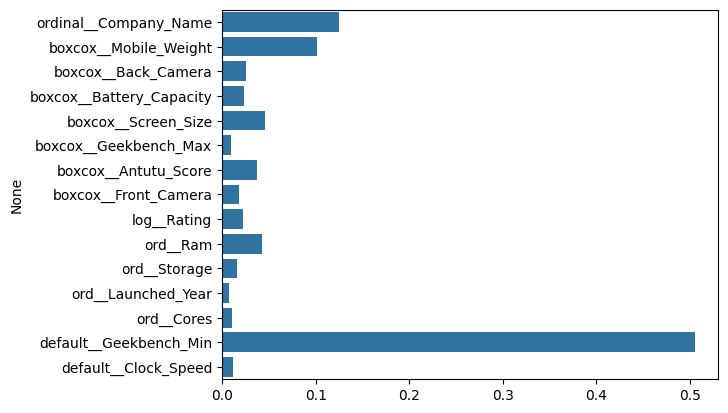

In [149]:
sns.barplot(x = rnd_reg.feature_importances_, y = prepro_df.columns)

In [150]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [151]:
-cross_val_score(AdaBoostRegressor(), X = preprocessed, y = train_data['Launched_Price_India'], cv = 3, scoring='neg_root_mean_squared_error').mean()

21431.646290476143

In [152]:
-cross_val_score(GradientBoostingRegressor(), X = preprocessed, y = train_data['Launched_Price_India'], cv = 3, scoring='neg_root_mean_squared_error').mean()

16152.348446151294

In [153]:
from sklearn.linear_model import SGDRegressor, LogisticRegression

In [154]:
-cross_val_score(SGDRegressor(random_state=42, penalty = 'l2', max_iter = 1000), X = preprocessed, y = train_data['Launched_Price_India'], cv = 3, scoring='neg_root_mean_squared_error').mean()

25986.4238645775

In [155]:
from sklearn.svm import SVR

In [156]:
-cross_val_score(SVR(), X = preprocessed, y = train_data['Launched_Price_India'], cv = 3, scoring='neg_root_mean_squared_error').mean()

43919.7686657603

let us start with lin_reg and check if its overfitting

In [157]:
from sklearn.model_selection import learning_curve

In [158]:
def plot_learning_curves(model, x, y):
  train_sizes, train_scores, valid_scores = learning_curve(
      model, x, y, train_sizes = np.linspace(0.1, 1, 40), cv = 5, scoring = 'neg_root_mean_squared_error'
  )
  train_errors = -train_scores.mean(axis = 1)
  valid_errors = -valid_scores.mean(axis = 1)
  plt.grid(True)
  plt.title('Train vs Valid errors')
  plt.plot(train_sizes, train_errors, 'r-+', linewidth = 2, label = 'train')
  plt.plot(train_sizes, valid_errors, 'b-', linewidth = 2, label = 'valid')
  plt.ylabel('RMSE')
  plt.xlabel('Train Sizes')
  plt.legend()

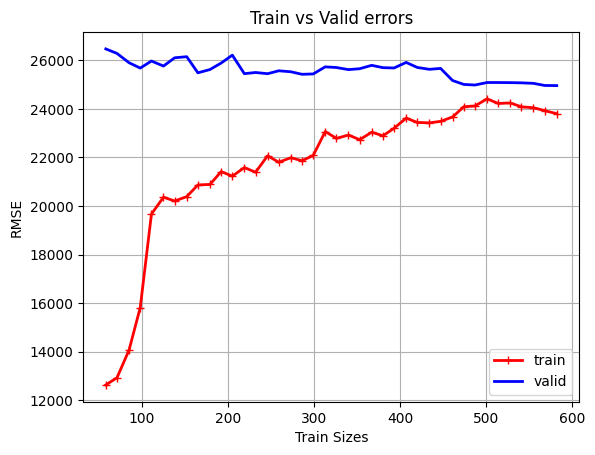

In [187]:
plot_learning_curves(LinearRegression(), preprocessed, train_data['Launched_Price_India'])

definitely this model is overfitting as there is more gap between train and valid errors

In [160]:
from sklearn.preprocessing import PolynomialFeatures

In [161]:
from sklearn.linear_model import ElasticNet

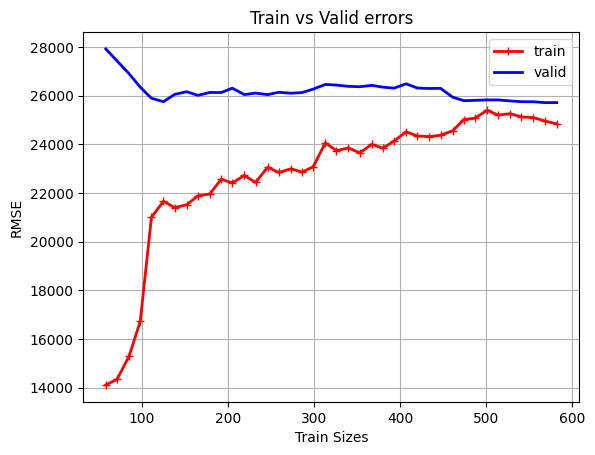

In [188]:
plot_learning_curves(ElasticNet(alpha = 0.2, l1_ratio = 0.3), preprocessed, train_data['Launched_Price_India'])

Not much improvement but atelast we reduced the variance a little bit.

In [163]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

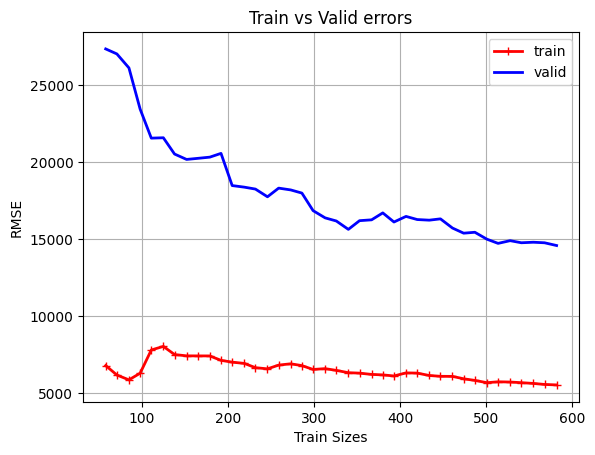

In [189]:
plot_learning_curves(rnd_reg, preprocessed, train_data['Launched_Price_India'])

It is highly overfitted.

In [165]:
from scipy.stats import randint, uniform

In [195]:
param_dist = {
    'max_depth': randint(3, 20),
    'n_estimators': randint(50, 300),
    'min_samples_split': randint(2, 100),
}

rnd_src = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

rnd_src.fit(preprocessed, train_data['Launched_Price_India'])

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a799082790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a798561e50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a798562290>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [198]:
-rnd_src.best_score_, rnd_src.best_params_

(17005.115897875592,
 {'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 241})

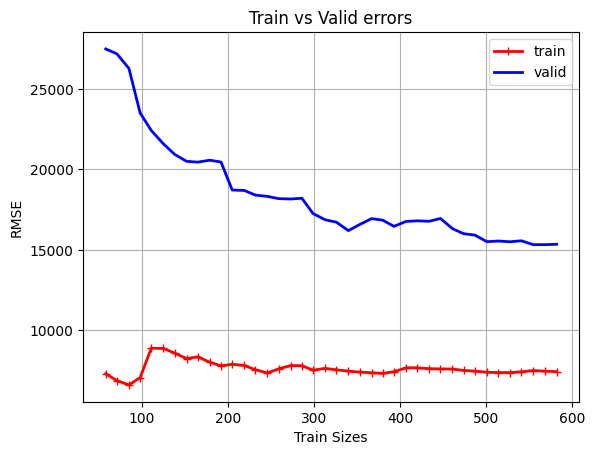

In [190]:
plot_learning_curves(rnd_src.best_estimator_, preprocessed, train_data['Launched_Price_India'])

In [169]:
gbrt_param_grid = {
    'max_depth': [2, 5],
    'n_estimators': [200, 350],
    'learning_rate': [0.01, 0.05]
}
gbrt_grd_src = GridSearchCV(
    GradientBoostingRegressor(random_state = 42), param_grid = gbrt_param_grid, cv = 3, scoring = 'neg_root_mean_squared_error'
)
gbrt_grd_src.fit(preprocessed, train_data['Launched_Price_India'])

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [2, 5],
                         'n_estimators': [200, 350]},
             scoring='neg_root_mean_squared_error')

In [170]:
-gbrt_grd_src.best_score_

14664.081753792932

In [171]:
train_data['Launched_Price_India'].describe()

,Launched_Price_India
count,728.000000
mean,51231.035714
std,41368.269470
min,5999.000000
25%,20999.000000
50%,36999.000000
75%,74900.000000
max,274999.000000


In [172]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [173]:
bg_reg = BaggingRegressor(DecisionTreeRegressor(), max_samples = 100, n_estimators = 500, random_state = 42)
-cross_val_score(bg_reg, preprocessed, train_data['Launched_Price_India'], cv = 3, scoring = 'neg_root_mean_squared_error').mean()

21098.77392901981

In [174]:
from sklearn.ensemble import VotingRegressor

In [175]:
vot_reg = VotingRegressor(
    estimators= [
        ('rnd', rnd_src.best_estimator_),
        ('gbrt', gbrt_grd_src.best_estimator_),
        ('bg', bg_reg)
    ],
    weights= [0.2, 0.6, 0.2]
)

In [176]:
-cross_val_score(vot_reg, preprocessed, train_data['Launched_Price_India'], cv = 3, scoring = 'neg_root_mean_squared_error').mean()

15642.704265340246

It has similar bias but it will have less variance than if used along.

In [177]:
X_test = X_test.drop(X_test[X_test['Company_Name'] == 'Nokia'].index, axis = 0)
X_test = X_test.drop(X_test[X_test['Ram'] == 10].index, axis = 0)

In [178]:
X_test_preprocessed = preprocessing.transform(X_test)

In [179]:
X_test_preprocessed.shape

(182, 15)

In [180]:
vot_reg.fit(preprocessed, train_data['Launched_Price_India'])

VotingRegressor(estimators=[('rnd',
                             RandomForestRegressor(max_depth=8,
                                                   min_samples_split=3,
                                                   n_estimators=241,
                                                   random_state=42)),
                            ('gbrt',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=5,
                                                       n_estimators=350,
                                                       random_state=42)),
                            ('bg',
                             BaggingRegressor(estimator=DecisionTreeRegressor(),
                                              max_samples=100, n_estimators=500,
                                              random_state=42))],
                weights=[0.2, 0.6, 0.2])

Here score is coefficient of determination of the prediction. Best possible score can be 1.

In [181]:
vot_reg.score(X_test_preprocessed, y_test.loc[X_test.index, 'Launched_Price_India'])

0.6654584281452547

In [182]:
gbrt_grd_src.best_estimator_.score(X_test_preprocessed, y_test.loc[X_test.index, 'Launched_Price_India'])

0.6368275649883184

In [183]:
rnd_src.best_estimator_.score(X_test_preprocessed, y_test.loc[X_test.index, 'Launched_Price_India'])

0.6552756501716739

In [184]:
rnd_reg.score(X_test_preprocessed, y_test.loc[X_test.index, 'Launched_Price_India'])

0.6547809345211396

Based on business requirements and choosing the appropriate scoring paramater, you can select the model. There's still room for improvement is this, you can give it a try...

In [185]:
final_model = make_pipeline(
    preprocessing,
    gbrt_grd_src.best_estimator_
)

In [186]:
import joblib

joblib.dump(final_model, 'model.pkl')
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>